<a href="https://colab.research.google.com/github/baggio18-droid/ImageProcessingTasks/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Changing the brightness of the image: 
 ------------------------------------  
Enter brightness value: 50


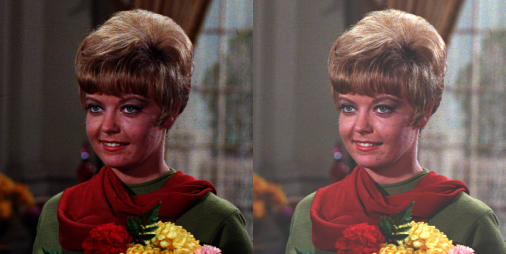

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tkinter import Frame

print(' Changing the brightness of the image: ')
print(' ------------------------------------  ')

try:
  brightness = int(input('Enter brightness value: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] +brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Changing the brightness of the image:
--------------------------------
Enter brightness value: 40


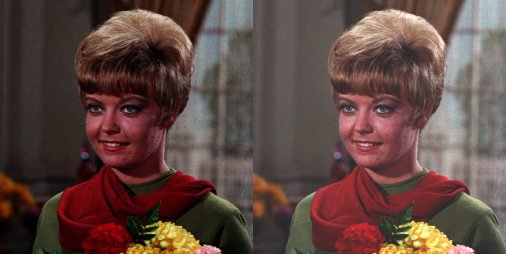

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tkinter import Frame

print('Changing the brightness of the image:')
print('--------------------------------')
try:
  brightness = int(input('Enter brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


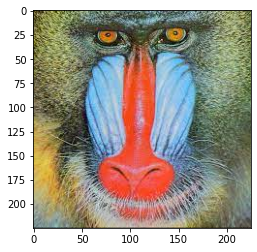

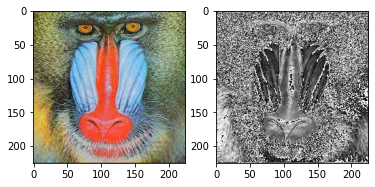

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/Image/mandrill.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = ( R + G + B) * 0.3

f, axarr = plt.subplots(1,2) #making two plots for the output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

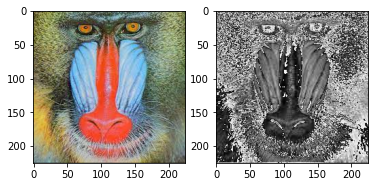

In [ ]:
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

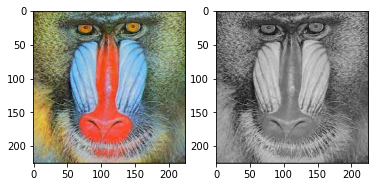

In [ ]:
mandrill = cv.imread('/content/drive/MyDrive/Image/mandrill.tiff')
mandrill_rgb = cv.cvtColor(mandrill,cv.COLOR_BGR2RGB)

mandrill_averaging = cv.imread('/content/drive/MyDrive/Image/mandrill.tiff')
mandrill_averaging[:] = mandrill_averaging.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(mandrill_rgb)
ax[1].imshow(mandrill_averaging)

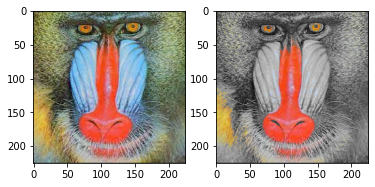

In [ ]:
mandrill_isolated_color = cv.imread('/content/drive/MyDrive/Image/mandrill.tiff')
red, mask = cv.threshold(mandrill_isolated_color[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(mandrill_isolated_color)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(mandrill_rgb, mask3)

gray = cv.cvtColor(mandrill_isolated_color, cv.COLOR_BGR2GRAY)
mandrill_isolated_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(mandrill_isolated_color, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(mandrill_rgb)
ax[1].imshow(out, cmap='gray')